# Import library & Load Datasets



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 13})
pd.set_option('display.max_columns', 30)

In [ ]:
path = '/content/drive/MyDrive/DA_Final/'
customer = pd.read_csv(path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
orders = pd.read_csv(path + 'olist_orders_dataset.csv')
order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
products = pd.read_csv(path + 'olist_products_dataset.csv')
sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')
name_translation = pd.read_csv(path + 'product_category_name_translation.csv')

# EDA

## Overview and merge datasets




In [ ]:
def count_null_values(df, dataset_name):
    
    num_of_total_null_values = sum(df.isnull().sum().values)
    print(f"{dataset_name} dataset has {num_of_total_null_values} null values")
    return num_of_total_null_values


customer_null = count_null_values(customer, "Customer")
geolocation_null = count_null_values(geolocation, "Geolocation")
order_items_null = count_null_values(order_items, "Order Items")
order_payments_null = count_null_values(order_payments, "Order Payments")
order_reviews_null = count_null_values(order_reviews, "Order Reviews")
orders_null = count_null_values(orders, "Orders")
products_null = count_null_values(products, "Products")
sellers_null = count_null_values(sellers, "Products")

Customer dataset has 0 null values
Geolocation dataset has 0 null values
Order Items dataset has 0 null values
Order Payments dataset has 0 null values
Order Reviews dataset has 0 null values
Orders dataset has 4908 null values
Products dataset has 2448 null values
Products dataset has 0 null values


In [ ]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation.duplicated().sum()

261831

In [ ]:
geolocation.drop_duplicates(inplace=True)
geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

In [ ]:
geo = geolocation.groupby('geolocation_zip_code_prefix', as_index=False)[['geolocation_lat','geolocation_lng']].mean()

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Filtered the combined dataset only to have orders that had been delivered

In [ ]:
deliver = orders[orders.order_status=='delivered']

Convert the datatype of all the time columns to date:

In [ ]:
## Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date','order_delivered_customer_date']
for col in timestamp_cols:
    deliver[col] = pd.to_datetime(deliver[col]).dt.date

In [ ]:
## Extracting attributes for purchase date - Year and Month
deliver['order_purchase_month'] = deliver['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
deliver['order_purchase_month_num'] = deliver['order_purchase_timestamp'].apply(lambda x: x.month)
deliver['order_purchase_year_month'] = deliver['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y-%m'))

## Extracting attributes for purchase date - Day and Day of Week
deliver['order_purchase_dayofweek_name'] = deliver['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
deliver.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_month,order_purchase_month_num,order_purchase_year_month,order_purchase_dayofweek_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,Oct,10,2017-10,Mon
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,Jul,7,2018-07,Tue
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,Aug,8,2018-08,Wed
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,Nov,11,2017-11,Sat
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,Feb,2,2018-02,Tue


In [ ]:
deliver.order_delivered_customer_date.isna().sum()

8

In [ ]:
deliver.dropna(subset='order_delivered_customer_date', inplace=True)

In [ ]:
deliver['delivery_time'] = (deliver['order_delivered_customer_date'] - deliver['order_purchase_timestamp']).dt.days
deliver['estimate_delivery_time'] = (deliver['order_estimated_delivery_date'] - deliver['order_purchase_timestamp']).dt.days
deliver['approval_time'] = (deliver['order_approved_at'] - deliver['order_purchase_timestamp']).dt.days
deliver['seller_prepare'] = (deliver['order_delivered_carrier_date'] - deliver['order_approved_at']).dt.days
deliver['carrier_take'] = (deliver['order_delivered_customer_date'] - deliver['order_delivered_carrier_date']).dt.days
deliver = deliver[deliver.seller_prepare >= 0]

deliver['gap'] = (deliver['order_delivered_customer_date'] - deliver['order_estimated_delivery_date']).dt.days
deliver['lateness'] = np.select(condlist=[deliver['gap'] < 0,deliver['gap'] == 0],
                                choicelist=['Early','Ontime'],
                                default='Late')
deliver['gap_positive'] = deliver['gap'].apply(lambda x: -x if x<0 else x)

The main criterion in cleaning the dates was that the day the order was made had to be before the day it was approved, which had to be before the day was dropped off by the sender at the logistic operator, which had to be before the day the customer received their order. I dropped the rows that did not fit this criterion.

In [ ]:
deliver = deliver[~(deliver.order_delivered_customer_date < deliver.order_delivered_carrier_date)]
deliver = deliver[~(deliver.order_delivered_customer_date < deliver.order_approved_at)]

Merging Datasets

In [ ]:
df_product = order_items.drop(columns='order_item_id').merge(products[['product_id','product_category_name',
                                                                'product_weight_g','product_length_cm',
                                                                'product_height_cm','product_width_cm']],
                                                      on='product_id')
# Get package size
df_product["product_size_cm3"] = df_product['product_length_cm'] * df_product['product_width_cm'] * df_product['product_height_cm']
df_temp = df_product.groupby('order_id', as_index=False).agg({'product_id':'count','seller_id':'max','price':'sum','freight_value':'sum','product_weight_g':'sum','product_size_cm3':'sum'})
df_temp.rename(columns={'product_id':'total_items'}, inplace=True)
deliver = deliver.merge(df_temp, on='order_id',how = "left")
deliver = deliver.merge(customer[['customer_id', 'customer_zip_code_prefix','customer_city','customer_state']], on = "customer_id",how = "left")
deliver = deliver.merge(geo, 
             left_on = "customer_zip_code_prefix", 
             right_on = "geolocation_zip_code_prefix", 
             how = "left")
deliver = deliver.merge(sellers[['seller_id','seller_zip_code_prefix','seller_city','seller_state']],
              on='seller_id',how = "left")
deliver = deliver.merge(geo, 
             left_on = "seller_zip_code_prefix", 
             right_on = "geolocation_zip_code_prefix",
             suffixes = ( "_customer","_seller"),how = "left")

In order to compute distance between the customer and the seller, we need their zip code (associated latitude & longitude)

In [ ]:
## define a function to get distance from coordinates
from math import radians, sin, cos, asin, sqrt
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance between two pairs of (lat, lng)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))


In [ ]:
deliver['distance'] = deliver.apply(
    lambda row: haversine_distance(
        row["geolocation_lng_seller"],
        row["geolocation_lat_seller"],
        row["geolocation_lng_customer"],
        row["geolocation_lat_customer"],
    ),
    axis=1,
)
deliver = deliver[deliver.distance > 0]
deliver.shape

(95265, 39)

## Chang over time in number of orders

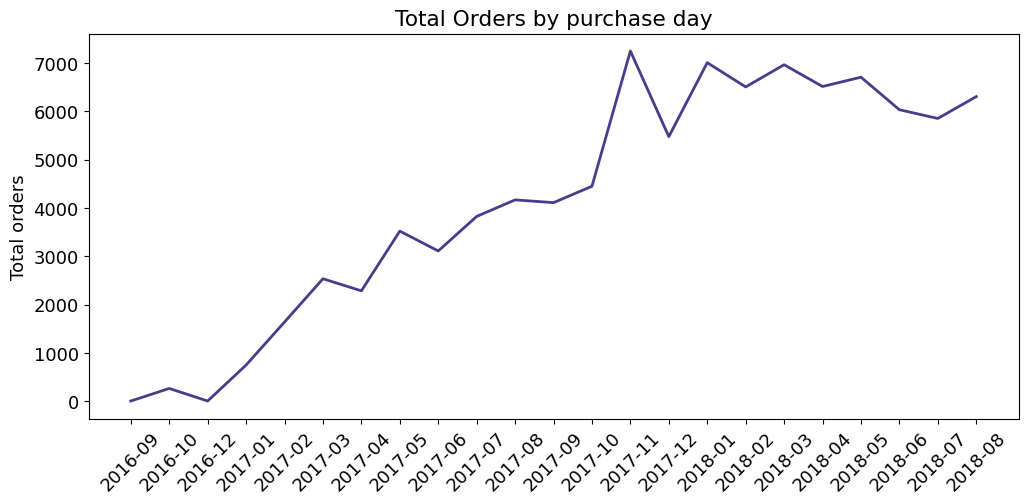

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Total Orders by purchase day')
sns.lineplot(data=deliver['order_purchase_year_month'].value_counts().sort_index(), 
             color='darkslateblue', linewidth=2)
plt.ylabel('Total orders')
plt.xticks(rotation = 45)
plt.show()

E-commerce on Brazil really has a growing trend along the time. We can see some seasonality with peaks at specific months, but in general we can see clear that customers are more prone to buy things online than before.

## Review score

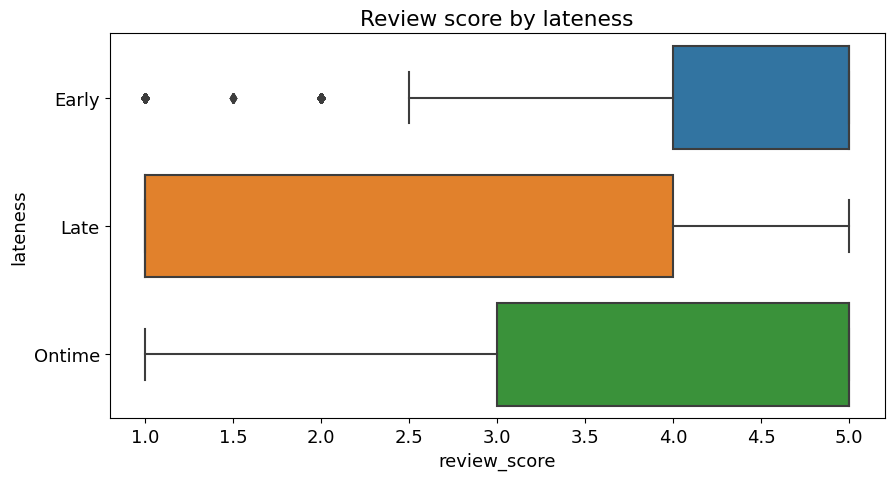

In [ ]:
order_df = deliver[['order_id','lateness']]
order_reviews = order_reviews.groupby('order_id', as_index=False)['review_score'].mean()
reviews = order_df.merge(order_reviews, how='left', on='order_id')
plt.figure(figsize=(10,5))
sns.boxplot(reviews,
            x='review_score',
            y='lateness')
plt.title('Review score by lateness')
plt.show()

Late delivery has a significant negative impact on customer satisfaction.
These late delivered orders have low review scores, thus, it is a need for Olist to measure and care more about their delivered partners and often late delivered sellers to increase customer satisfaction.

## Payment

Customers can pay with more than one payment method and therefore we have duplicate order ids in this frame. The sequential feature is used to indicate the payment method order.

In [ ]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_payments.duplicated().sum()

0

In [ ]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


There are four payment methods: credit card, debit card, boleto and voucher. Boleto is a brazillian payment method which is similar to a payment/bank slip.

In [ ]:
payment = order_df.merge(order_payments, how='left', on='order_id')
df = payment.pivot_table(index='lateness', 
               columns='payment_type', 
               values='order_id',
               aggfunc='nunique').reset_index()
df

payment_type,lateness,boleto,credit_card,debit_card,voucher
0,Early,17201,67588,1340,3382
1,Late,1395,4915,76,220
2,Ontime,296,930,37,38


The majority of orders were paid on credit card.

## Category

In [ ]:
df_tmp = df_product[['order_id','product_category_name','price']].merge(name_translation,
                                        on = "product_category_name")
df_tmp.head()

,order_id,product_category_name,price,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.9,cool_stuff
1,130898c0987d1801452a8ed92a670612,cool_stuff,55.9,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,cool_stuff,64.9,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,cool_stuff,58.9,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,cool_stuff,58.9,cool_stuff


**Top 10 categories bring revenue:**

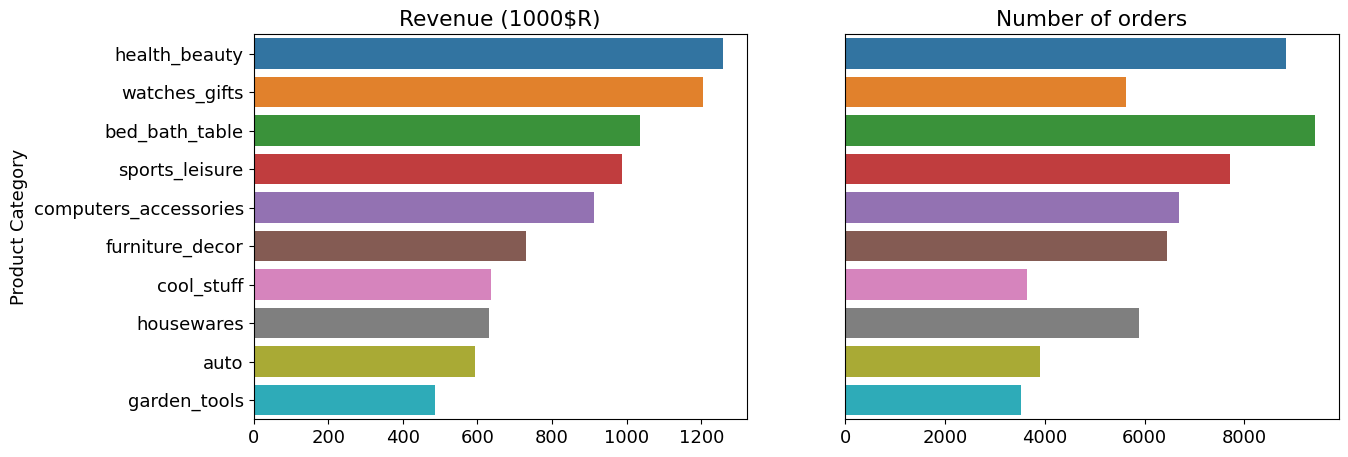

In [ ]:
prod_cat=df_tmp.pivot_table(values=['price', 'order_id'], index=['product_category_name_english']
                          , aggfunc={'price': 'sum', 'order_id': 'nunique'})
prod_cat["price"]=prod_cat["price"]/1000
prod_cat.sort_values(by='price', ascending = False, inplace = True)
prod_cat_top=prod_cat.rename(columns={'order_id':'no_of_order','price':"revenue($R1000)"}).head(10)

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.title('Revenue (1000$R)')
sns.barplot(prod_cat_top,
            x='revenue($R1000)', 
            y= prod_cat_top.index)
plt.ylabel('Product Category')
plt.xlabel(None)
plt.subplot(122)
plt.title('Number of orders')
sns.barplot(prod_cat_top,
            x='no_of_order', 
            y= prod_cat_top.index)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks([])
plt.show()

# Delivery Performance

In [ ]:
deliver_validate = deliver[deliver.order_purchase_year_month=='2018-08']
deliver = deliver[(deliver.order_purchase_year_month>='2017-08')&(deliver.order_purchase_year_month<='2018-07')]

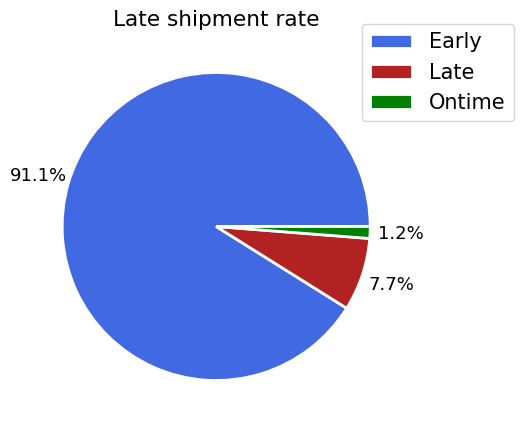

In [ ]:
data_plot = deliver.lateness.value_counts()
plt.figure(figsize=(12,5))
plt.title('Late shipment rate')
plt.pie(data_plot.values, 
        autopct='%.1f%%',
        pctdistance=1.2, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
        colors=['royalblue', 'firebrick','green'],
        textprops={'color':'black','fontsize': 13})
plt.legend(data_plot.index,
           loc="center right",
           bbox_to_anchor=(0.8, 0.4, 0.5, 1), 
           fontsize=15, title_fontsize=15)

plt.show()

1. Late delivery: What are the influential factors?  
2. Over 90% orders early: How can Olist deliver so many orders early?

In [ ]:
data = deliver[['order_purchase_timestamp','lateness','approval_time',
       'seller_prepare', 'carrier_take']]
data.head()

,order_purchase_timestamp,lateness,approval_time,seller_prepare,carrier_take
0,2017-10-02,Early,0.0,2.0,6.0
1,2018-07-24,Early,2.0,0.0,12.0
3,2017-11-18,Early,0.0,4.0,10.0
4,2018-02-13,Early,0.0,1.0,2.0
11,2018-06-07,Early,2.0,2.0,8.0


In [ ]:
data[data.lateness=='Late'].groupby('order_purchase_timestamp')['lateness'].count()

order_purchase_timestamp
2017-08-01     7
2017-08-02     4
2017-08-03     3
2017-08-04     4
2017-08-05     2
              ..
2018-07-27     4
2018-07-28     1
2018-07-29     7
2018-07-30    25
2018-07-31    20
Name: lateness, Length: 349, dtype: int64

In [ ]:
data['order_purchase_timestamp'].value_counts().sort_index()

2017-08-01    160
2017-08-02    148
2017-08-03    142
2017-08-04    138
2017-08-05    112
             ... 
2018-07-27    184
2018-07-28    166
2018-07-29    179
2018-07-30    261
2018-07-31    310
Name: order_purchase_timestamp, Length: 365, dtype: int64

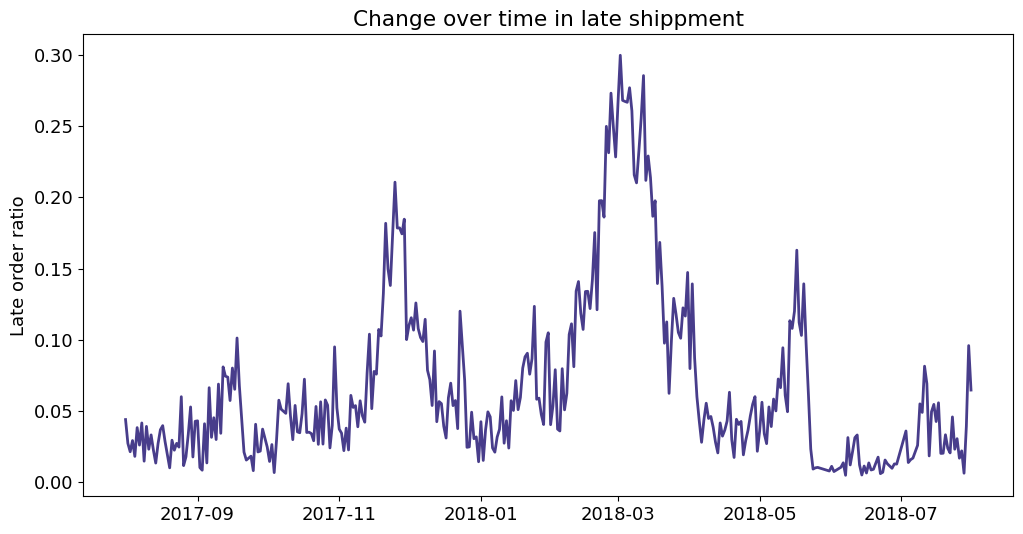

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Change over time in late shippment')
sns.lineplot(data=data[data.lateness=='Late'].groupby('order_purchase_timestamp')['lateness'].count()/data['order_purchase_timestamp'].value_counts().sort_index(), 
             color='darkslateblue', linewidth=2)
plt.ylabel('Late order ratio')
# plt.xticks(rotation = 45)
plt.show()

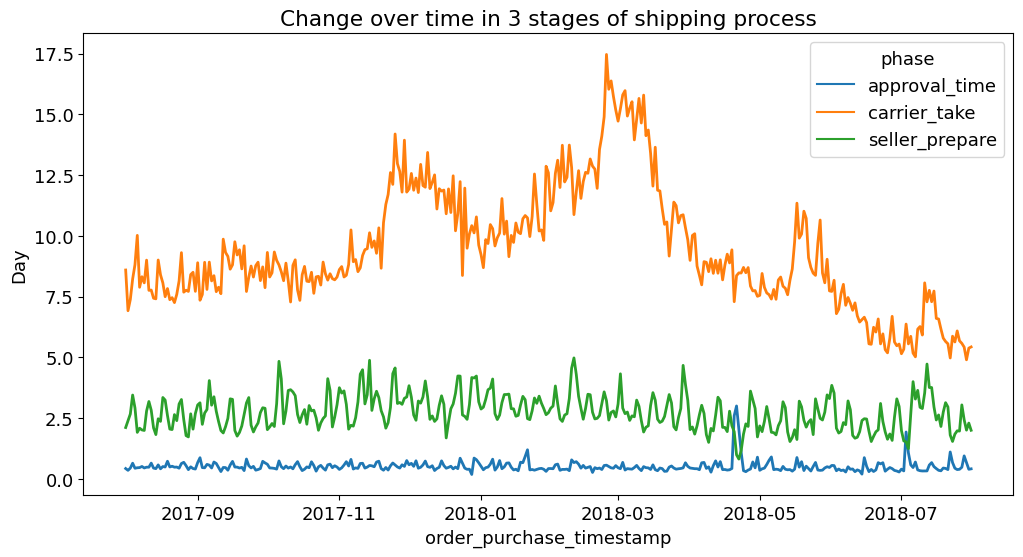

In [ ]:
data = pd.melt(data, 
        id_vars=['order_purchase_timestamp','lateness'],
        value_vars=['approval_time','seller_prepare','carrier_take'],
        var_name='phase',
        value_name='time')

data_plot = data.groupby(['order_purchase_timestamp','phase'], as_index=False)['time'].mean()
plt.figure(figsize=(12, 6))
plt.title('Change over time in 3 stages of shipping process')
sns.lineplot(data=data_plot,
             x='order_purchase_timestamp',
             y='time',
             hue='phase',
             color='darkslateblue', linewidth=2)
plt.ylabel('Day')
# plt.xticks(rotation = 45)
plt.show()

 The Olist currently has a contract with the Post Office.

The time taken by the carrier tends to fluctuate in correlation with Olist's late delivery rate.  
Delivery is heavily dependent on one carrier partner (Post Office).
 

*   More cooperation with 1-2 shipping organizations.
*   Investing in development  of own delivery service.



The majority of orders were delivered 1-10 days late:

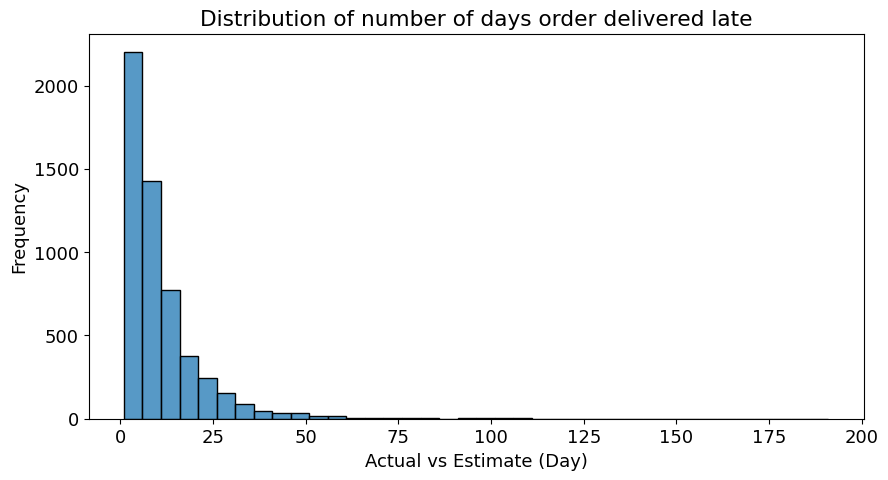

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of number of days order delivered late')
sns.histplot(data=deliver[deliver['lateness']=='Late'],
             x='gap_positive',
             binwidth=5)
plt.xlabel('Actual vs Estimate (Day)')
plt.ylabel('Frequency')
plt.show()

The majority of orders were delivered **1-10 days late**.

In [ ]:
def delivery_range(row):
    if row['customer_state'] == row['seller_state']:
        return 'Intrastate'
    else: return 'Interstate'

In [ ]:
deliver['delivery_range'] = deliver.apply(delivery_range, axis=1)

In [ ]:
deliver.groupby('lateness', as_index=False)['delivery_range'].value_counts()

,lateness,delivery_range,count
0,Early,Interstate,40348
1,Early,Intrastate,24370
2,Late,Interstate,4376
3,Late,Intrastate,1068
4,Ontime,Interstate,609
5,Ontime,Intrastate,273


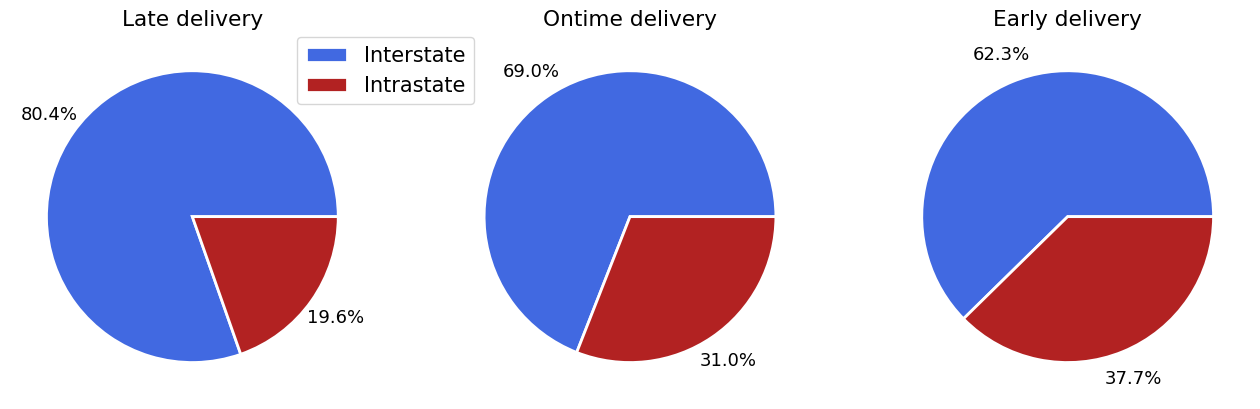

In [ ]:
plt.figure(figsize=(16,6))
# plt.suptitle('')
plt.subplot(131)
plt.title('Late delivery')
plt.pie(deliver[deliver.lateness=='Late'].delivery_range.value_counts().values, 
        autopct='%.1f%%',
        pctdistance=1.2, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
        colors=['royalblue', 'firebrick','green'],
        textprops={'color':'black','fontsize': 13})
plt.legend(deliver[deliver.lateness=='Late'].delivery_range.value_counts().index,
           loc="center right",
           bbox_to_anchor=(0.8, 0.4, 0.5, 1), 
           fontsize=15, title_fontsize=15)
plt.subplot(132)
plt.title('Ontime delivery')
plt.pie(deliver[deliver.lateness=='Ontime'].delivery_range.value_counts().values, 
        autopct='%.1f%%',
        pctdistance=1.2, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
        colors=['royalblue', 'firebrick','green'],
        textprops={'color':'black','fontsize': 13})
plt.subplot(133)
plt.title('Early delivery')
plt.pie(deliver[deliver.lateness=='Early'].delivery_range.value_counts().values, 
        autopct='%.1f%%',
        pctdistance=1.2, 
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
        colors=['royalblue', 'firebrick','green'],
        textprops={'color':'black','fontsize': 13})
plt.show()

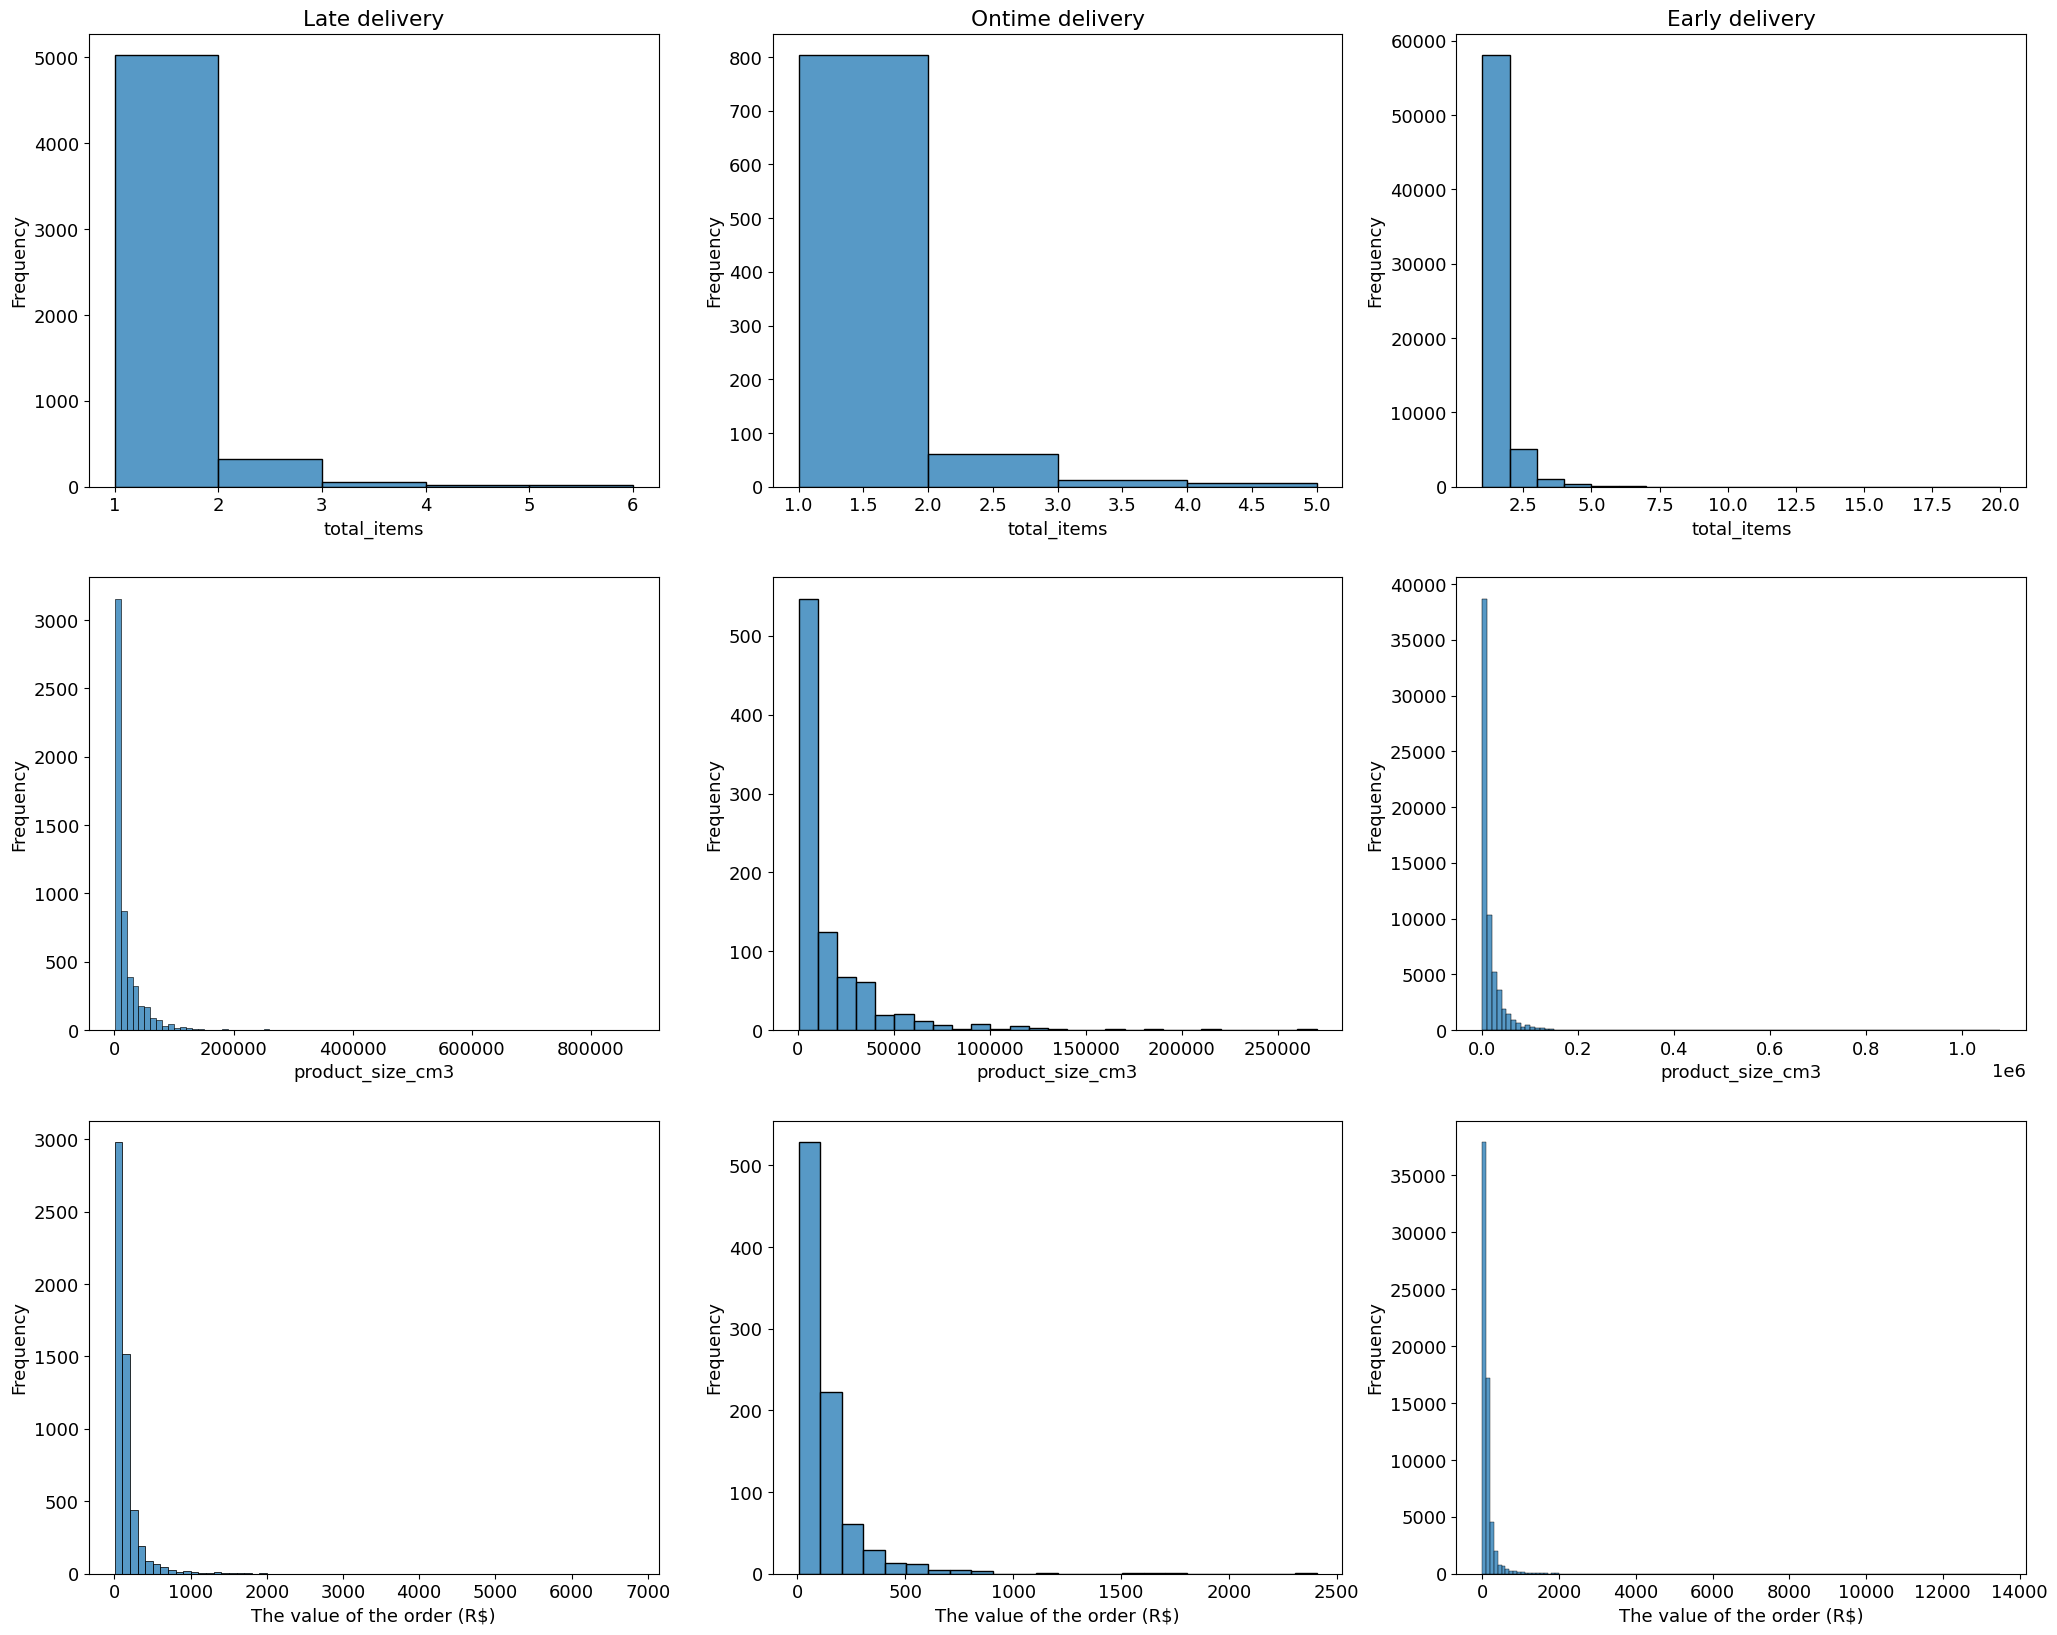

In [ ]:
plt.figure(figsize=(25,20))
# plt.suptitle('')
plt.subplot(331)
plt.title('Late delivery')
sns.histplot(data=deliver[deliver['lateness']=='Late'],
             x='total_items',
             binwidth=1)
plt.ylabel('Frequency')
plt.subplot(332)
plt.title('Ontime delivery')
sns.histplot(data=deliver[deliver['lateness']=='Ontime'],
             x='total_items',
             binwidth=1)
plt.ylabel('Frequency')
plt.subplot(333)
plt.title('Early delivery')
sns.histplot(data=deliver[deliver['lateness']=='Early'],
             x='total_items',
             binwidth=1)
plt.ylabel('Frequency')


plt.subplot(334)
sns.histplot(data=deliver[deliver['lateness']=='Late'],
             x='product_size_cm3',
             binwidth=10000)
plt.ylabel('Frequency')
plt.subplot(335)
sns.histplot(data=deliver[deliver['lateness']=='Ontime'],
             x='product_size_cm3',
             binwidth=10000)
plt.ylabel('Frequency')
plt.subplot(336)
sns.histplot(data=deliver[deliver['lateness']=='Early'],
             x='product_size_cm3',
             binwidth=10000)
plt.ylabel('Frequency')

plt.subplot(337)
sns.histplot(data=deliver[deliver['lateness']=='Late'],
             x='price',
             binwidth=100)
plt.xlabel('The value of the order (R$)')
plt.ylabel('Frequency')
plt.subplot(338)
sns.histplot(data=deliver[deliver['lateness']=='Ontime'],
             x='price',
             binwidth=100)
plt.xlabel('The value of the order (R$)')
plt.ylabel('Frequency')
plt.subplot(339)
sns.histplot(data=deliver[deliver['lateness']=='Early'],
             x='price',
             binwidth=100)
plt.xlabel('The value of the order (R$)')
plt.ylabel('Frequency')

plt.show()

There is not much difference in delivery range, total items, size and value of orders between delivery status.  
What makes over 90% of orders delivered early?

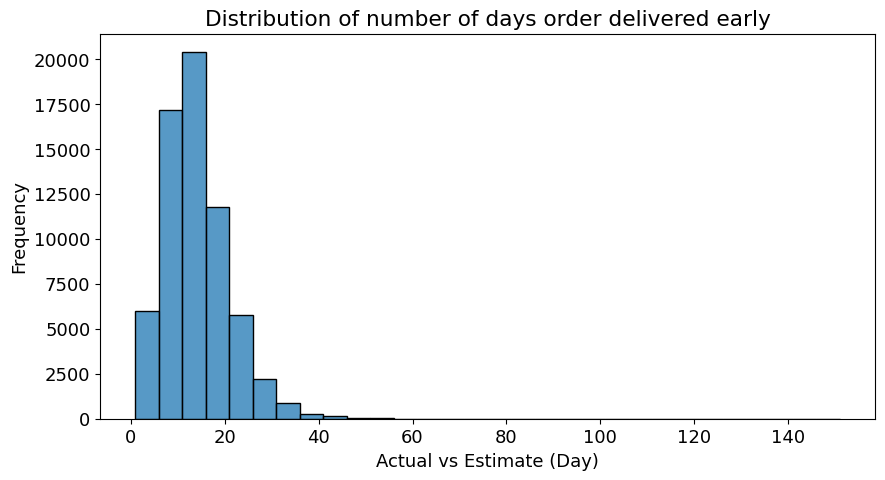

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of number of days order delivered early')
sns.histplot(data=deliver[deliver['lateness']=='Early'],
             x='gap_positive',
             binwidth=5)
plt.xlabel('Actual vs Estimate (Day)')
plt.ylabel('Frequency')
plt.show()

The majority of orders were delivered 10-15 days early.

Significant difference between estimate and actual delivery date. 

*   Setting estimated delivery time too long can affect customers’ purchasing decisions. 
*   Delivering too early to expected date can make it difficult for the customer to plan for receiving parcel.  

Olist need to improve delivery time estimation to close the gap.

# Predict delivery time

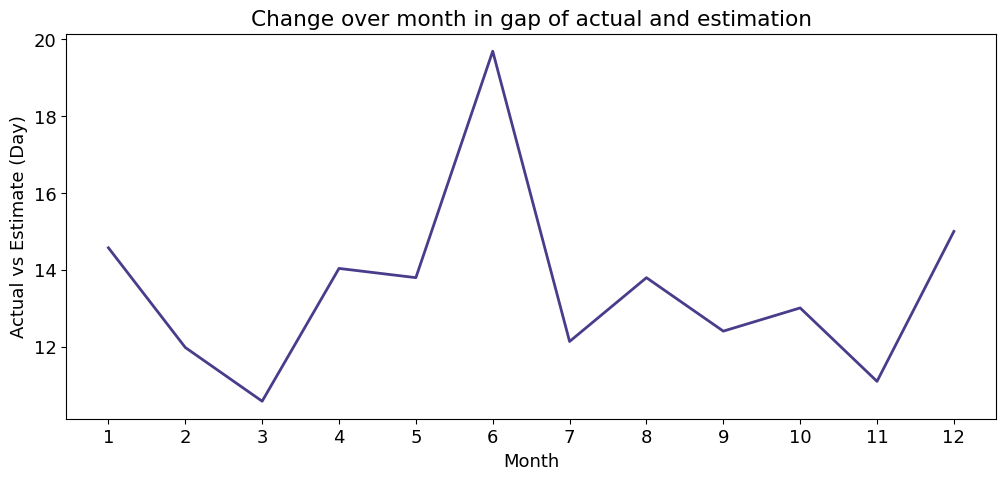

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Change over month in gap of actual and estimation')
sns.lineplot(data=deliver[deliver['lateness']=='Early'].groupby('order_purchase_month_num')['gap_positive'].mean().sort_index(), 
             color='darkslateblue', linewidth=2)
plt.ylabel('Actual vs Estimate (Day)')
plt.xlabel('Month')
plt.xticks(range(1,13,1))
plt.show()

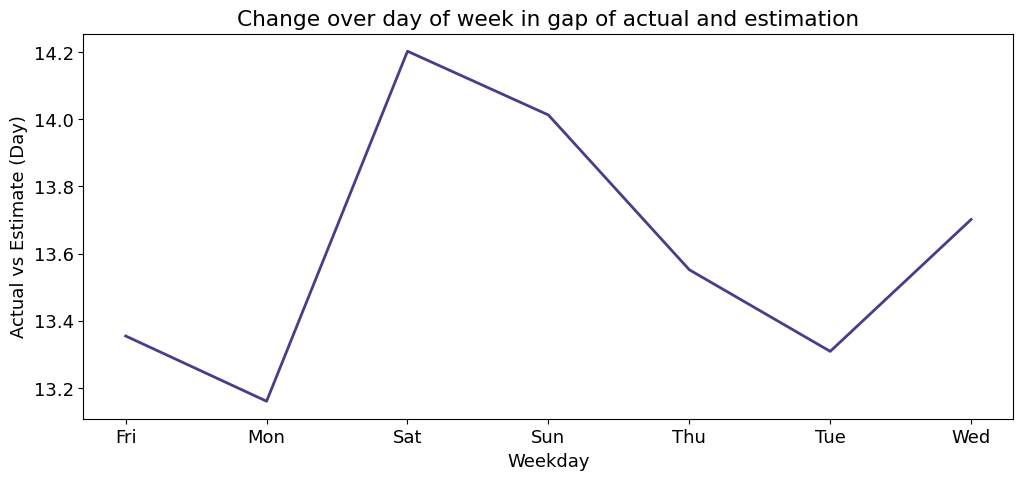

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Change over day of week in gap of actual and estimation')
sns.lineplot(data=deliver[deliver['lateness']=='Early'].groupby('order_purchase_dayofweek_name')['gap_positive'].mean().sort_index(), 
             color='darkslateblue', linewidth=2)
plt.ylabel('Actual vs Estimate (Day)')
plt.xlabel('Weekday')
plt.show()

Order purchase date influence delivery time so the gap of actuality and estimation change over time.

Correlation coefficient between delivery time and other factors:

In [ ]:
w = deliver[['delivery_time','total_items','price', 'product_weight_g',
       'product_size_cm3','distance']]
w.corr().style.background_gradient(cmap='Blues')

,delivery_time,total_items,price,product_weight_g,product_size_cm3,distance
delivery_time,1.000000,-0.025237,0.055811,0.075573,0.066099,0.405866
total_items,-0.025237,1.000000,0.169239,0.239351,0.304404,-0.018245
price,0.055811,0.169239,1.000000,0.360711,0.323937,0.084658
product_weight_g,0.075573,0.239351,0.360711,1.000000,0.830606,-0.008534
product_size_cm3,0.066099,0.304404,0.323937,0.830606,1.000000,-0.014488
distance,0.405866,-0.018245,0.084658,-0.008534,-0.014488,1.000000


There’s only correlation between shipping distance and delivery time.

In [ ]:
data = deliver[deliver.lateness=='Early']
deliver_validate = deliver_validate[deliver_validate.lateness=='Early']

In [ ]:
q1=data['gap'].quantile(0.25)
q3=data['gap'].quantile(0.75)
IQR= q3-q1
lower_whisker = q1-1.5*IQR
upper_whisker = q3+1.5*IQR
data = data[(data['gap']>=lower_whisker)&(data['gap']<=upper_whisker)]

In [ ]:
q1=data['delivery_time'].quantile(0.25)
q3=data['delivery_time'].quantile(0.75)
IQR= q3-q1
lower_whisker = q1-1.5*IQR
upper_whisker = q3+1.5*IQR
data = data[(data['delivery_time']>=lower_whisker)&(data['delivery_time']<=upper_whisker)]

Distribution of the target:

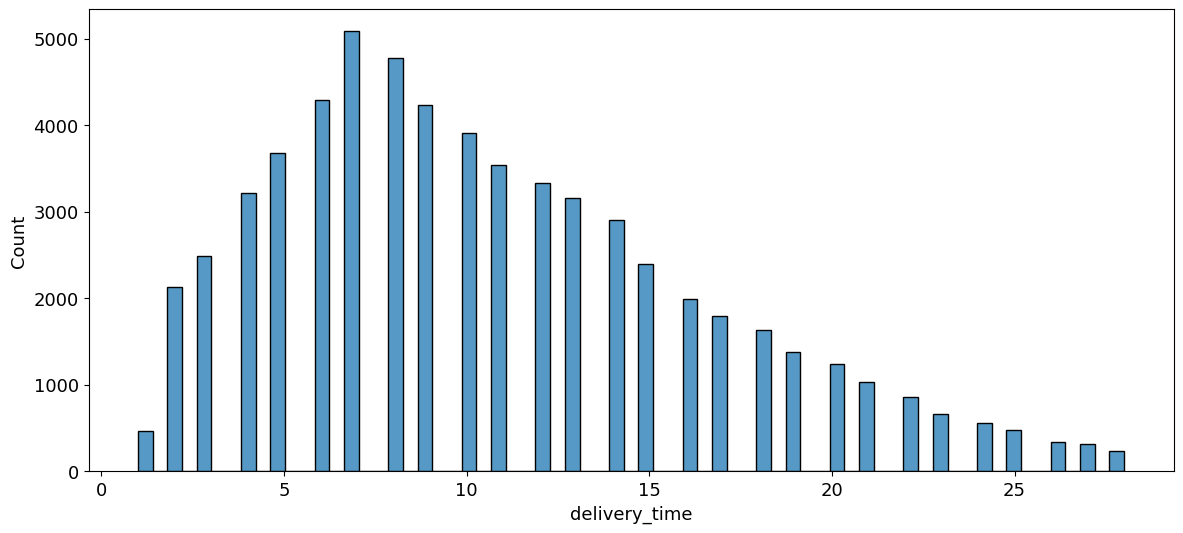

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data,
             x='delivery_time')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import preprocessing

In [ ]:
deliver_validate = deliver_validate[['order_purchase_timestamp','order_purchase_year_month','estimate_delivery_time','delivery_time','order_purchase_month','order_purchase_dayofweek_name','distance']]

In [ ]:
data = data[['order_purchase_timestamp','order_purchase_year_month','estimate_delivery_time','delivery_time','order_purchase_month','order_purchase_dayofweek_name','distance']]
data.dropna(subset='distance', inplace=True)

In [ ]:
data = pd.concat([data,deliver_validate])

In [ ]:
# OneHot encoding: get_dummies
encode_features = ['order_purchase_month','order_purchase_dayofweek_name']
data = pd.get_dummies(data, columns = encode_features, drop_first=True)

In [ ]:
deliver_validate = data[data.order_purchase_year_month=='2018-08']
data = data[data.order_purchase_year_month!='2018-08']

In [ ]:
X = data.drop(columns=['order_purchase_timestamp','delivery_time','order_purchase_year_month','estimate_delivery_time'])
y = data['delivery_time']

X.head()

,distance,order_purchase_month_Aug,order_purchase_month_Dec,order_purchase_month_Feb,order_purchase_month_Jan,order_purchase_month_Jul,order_purchase_month_Jun,order_purchase_month_Mar,order_purchase_month_May,order_purchase_month_Nov,order_purchase_month_Oct,order_purchase_month_Sep,order_purchase_dayofweek_name_Mon,order_purchase_dayofweek_name_Sat,order_purchase_dayofweek_name_Sun,order_purchase_dayofweek_name_Thu,order_purchase_dayofweek_name_Tue,order_purchase_dayofweek_name_Wed
0,18.538322,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,849.520470,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1822.132331,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,29.765008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,451.747986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(49716, 18)

In [ ]:
X_test.shape

(12429, 18)

In [ ]:
print("Mean Absolute Error:", metrics.mean_absolute_error(deliver.delivery_time, deliver.estimate_delivery_time))
print("Mean Squared Error:", metrics.mean_squared_error(deliver.delivery_time, deliver.estimate_delivery_time))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(deliver.delivery_time, deliver.estimate_delivery_time)))

Mean Absolute Error: 13.163448004053826
Mean Squared Error: 232.9393615224368
Root Mean Squared Error: 15.262351113849949


In [ ]:
# build and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# test model
y_pred = lr.predict(X_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# interpret model
X2 = sm.add_constant(X_train)
model_stats = sm.OLS(y_train, X2).fit()
model_stats.summary()

Mean Absolute Error: 3.778282021151313
Mean Squared Error: 23.004923703159292
Root Mean Squared Error: 4.796344827382545


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1370.
Date:                Sun, 14 May 2023   Prob (F-statistic):               0.00
Time:                        02:46:14   Log-Likelihood:            -1.4792e+05
No. Observations:               49716   AIC:                         2.959e+05
Df Residuals:                   49697   BIC:                         2.960e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 8.0563      0.090     89.891      0.000       7.881       8.232
distance                              0.0053   3.82e-05    139.323      0.000       0.005       0.005
order_purchase_month_Aug             -0.1943      0.109     -1.785      0.074      -0.408       0.019
order_purchase_month_Dec              2.3506      0.103     22.818      0.000       2.149       2.553
order_purchase_month_Feb              2.5914      0.100     25.935      0.000       2.396       2.787
order_purchase_month_Jan              1.5554      0.096     16.264      0.000       1.368       1.743
order_purchase_month_Jul             -2.1736      0.099    -21.943      0.000      -2.368      -1.979
order_purchase_month_Jun             -1.5685      0.101    -15.558      0.000      -1.766      -1.371
order_purchase_month_Mar              1.5428      0.100     15.437      0.000       1.347       1.739
order_purchase_month_May             -0.1811      0.098     -1.856      0.063      -0.372       0.010
order_purchase_month_Nov              1.5642      0.096     16.210      0.000       1.375       1.753
order_purchase_month_Oct              0.1653      0.108      1.534      0.125      -0.046       0.376
order_purchase_month_Sep              0.1448      0.109      1.323      0.186      -0.070       0.359
order_purchase_dayofweek_name_Mon    -1.5075      0.078    -19.403      0.000      -1.660      -1.355
order_purchase_dayofweek_name_Sat    -0.3469      0.086     -4.036      0.000      -0.515      -0.178
order_purchase_dayofweek_name_Sun    -1.2154      0.084    -14.522      0.000      -1.379      -1.051
order_purchase_dayofweek_name_Thu    -0.5234      0.079     -6.638      0.000      -0.678      -0.369
order_purchase_dayofweek_name_Tue    -1.2496      0.078    -16.080      0.000      -1.402      -1.097
order_purchase_dayofweek_name_Wed    -0.9612      0.078    -12.326      0.000      -1.114      -0.808
==============================================================================
Omnibus:                     3851.383   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4881.061
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       3.570   Cond. No.                     9.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lr.score(X_train, y_train)

0.33156333568805085

In [ ]:
lr.score(X_test, y_test)

0.3285267266070002

Deploy model on sample selected randomly from orders purchased in 8/2018:

In [ ]:
samp = deliver_validate.sample(5)
y_pred = lr.predict(samp.drop(columns=['order_purchase_timestamp','delivery_time','order_purchase_year_month','estimate_delivery_time']))
samp['new_estimate'] = y_pred
samp

,order_purchase_timestamp,order_purchase_year_month,estimate_delivery_time,delivery_time,distance,order_purchase_month_Aug,order_purchase_month_Dec,order_purchase_month_Feb,order_purchase_month_Jan,order_purchase_month_Jul,order_purchase_month_Jun,order_purchase_month_Mar,order_purchase_month_May,order_purchase_month_Nov,order_purchase_month_Oct,order_purchase_month_Sep,order_purchase_dayofweek_name_Mon,order_purchase_dayofweek_name_Sat,order_purchase_dayofweek_name_Sun,order_purchase_dayofweek_name_Thu,order_purchase_dayofweek_name_Tue,order_purchase_dayofweek_name_Wed,new_estimate
49109,2018-08-20,2018-08,10,3,106.044195,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6.918528
55987,2018-08-17,2018-08,26,10,385.737530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.913817
7570,2018-08-13,2018-08,17,15,631.480626,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9.713448
34424,2018-08-15,2018-08,8,5,391.803140,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.984844
81409,2018-08-08,2018-08,22,12,1459.128402,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14.662197


In [ ]:
samp[['order_purchase_timestamp','delivery_time','estimate_delivery_time','new_estimate']]

,order_purchase_timestamp,delivery_time,estimate_delivery_time,new_estimate
49109,2018-08-20,3,10,6.918528
55987,2018-08-17,10,26,9.913817
7570,2018-08-13,15,17,9.713448
34424,2018-08-15,5,8,8.984844
81409,2018-08-08,12,22,14.662197


Ecommerce shipping can be very complicated, and delays can and will happen for a variety of reasons.

Predicting accurate delivery times is a daunting task as many real-life uncontrollable outliers may severely impact the service for long periods of time as frequently as punctual errors and mismanaging decisions.

**Recommendation:**

Last-mile delivery was not executed efficiently:  
*   More cooperation with 1-2 shipping organizations.
*   Investing in development of own logistics service.





Setting the estimated delivery date by a range (e.g. 3-5 days) instead of an exact date.

Providing order tracking, frequent updates on the order status. Letting buyers know what to expect for their delivery and being notified of any late or early delivery. When you keep your customers up-to-date throughout the delivery process, you have the chance to build trust by making—and keeping—delivery promises that actually work for your customers. It’s hard to overstate how important this is for giving customers a feeling of control over their delivery experience and making them feel more confident that you’re actually going to deliver when you say you are.


Researching and improving model to estimate delivery time more accurately.

# Export data to Google Sheet

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# Create a new Google Spreadsheets
sh = gc.create('Final')

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    # Open file by gsheet key
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

In [ ]:
deliver.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_num', 'order_purchase_year_month',
       'order_purchase_dayofweek_name', 'wait_time', 'estimate_wait_time',
       'seller_carrier', 'carrier_customer', 'gap', 'lateness', 'total_items',
       'seller_id', 'price', 'freight_value', 'product_weight_g',
       'product_size_cm3', 'customer_zip_code_prefix', 'customer_city',
       'geolocation_zip_code_prefix_customer', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'seller_zip_code_prefix', 'seller_city',
       'geolocation_zip_code_prefix_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'distance'],
      dtype='object')

In [ ]:
df_orders = deliver.drop(columns=['order_status','seller_id','order_purchase_year', 'order_purchase_month',
       'order_purchase_month_num', 'order_purchase_year_month','seller_zip_code_prefix','geolocation_zip_code_prefix_seller',
       'order_purchase_dayofweek_name','customer_zip_code_prefix','geolocation_zip_code_prefix_customer'])
df_orders.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,wait_time,estimate_wait_time,seller_carrier,carrier_customer,gap,lateness,total_items,price,freight_value,product_weight_g,product_size_cm3,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,distance
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8,16,2.0,6.0,-8,Early,1,29.99,8.72,500.0,1976.0,sao paulo,SP,-23.577482,-46.587077,maua,SP,-23.680862,-46.444311,18.538322
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,14,20,2.0,12.0,-6,Early,1,118.70,22.76,400.0,4693.0,barreiras,BA,-12.186877,-44.540232,belo horizonte,SP,-19.807885,-43.980818,849.520470
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9,27,0.0,9.0,-18,Early,1,159.90,19.22,420.0,9576.0,vianopolis,GO,-16.745150,-48.514783,guariba,SP,-21.363473,-48.229588,514.407596
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,14,27,4.0,10.0,-13,Early,1,45.00,27.20,450.0,6000.0,sao goncalo do amarante,RN,-5.774002,-35.270976,belo horizonte,MG,-19.836871,-43.923241,1822.132331
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,3,13,1.0,2.0,-10,Early,1,19.90,8.72,250.0,11475.0,santo andre,SP,-23.676257,-46.514580,mogi das cruzes,SP,-23.541525,-46.262148,29.765008


In [ ]:
df_orders.shape

(96447, 25)

In [ ]:
df_tmp = df_product[['order_id','product_id','seller_id','shipping_limit_date','product_category_name']].merge(name_translation,
                                        on = "product_category_name",
                                        how='left')
df_tmp.shape

(112650, 6)

In [ ]:
df_tmp.head()

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,cool_stuff,cool_stuff


In [ ]:
export_data_to_new_sheet('1D-Oh9r7PbNZ57QimQECXvHBJX_0eyGRPxZNdBZZ22sQ', 'products', df_tmp)

In [ ]:
export_data_to_new_sheet('1D-Oh9r7PbNZ57QimQECXvHBJX_0eyGRPxZNdBZZ22sQ', 'orders', df_orders)